In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
import pickle
import nltk
import os
import sklearn.manifold
from collections import Counter


In [2]:
from spacy.lang.es.examples import sentences 

In [3]:
cien = "capi1.txt"
text_file = open(cien, "r")
dataset = text_file.read()
text_file.close()

In [4]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

Para poder disminuir el número de tokens sacamos primero los signos de puntuación y posteriormente las stopwords a modo de prueba

In [5]:
#la función para eliminar puntos y comas
import re, string
def remove_punctuation(text):
    return re.sub('[%s]' % re.escape(string.punctuation), ' ', text)

In [6]:
sacamos_puntuaciones = remove_punctuation(dataset)

In [7]:

#de esta forma queda el archivo
sacamos_puntuaciones

'\n\nGabriel García Márquez\n\nCien años de soledad\n\n\n\n\n\n\n \tI\t\n\n   Muchos años después  frente al pelotón de fusilamiento  el coronel Aureliano Buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo  Macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas que se precipitaban por un lecho de piedras pulidas  blancas y enormes como huevos prehistóricos  El mundo era tan reciente  que muchas cosas carecían de nombre  y para mencionarlas había que señalarías con el dedo  Todos los años  por el mes de marzo  una familia de gitanos desarrapados plantaba su carpa cerca de la aldea  y con un grande alboroto de pitos y timbales daban a conocer los nuevos inventos  Primero llevaron el imán  Un gitano corpulento  de barba montaraz y manos de gorrión  que se presentó con el nombre de Melquiades  hizo una truculenta demostración pública de lo que él mismo llamaba la octava maravilla de los

In [8]:
#posteriormente tokenizamos el archivo previo
doc_tokens = word_tokenize(sacamos_puntuaciones) 

In [9]:
print(doc_tokens)

['Gabriel', 'García', 'Márquez', 'Cien', 'años', 'de', 'soledad', 'I', 'Muchos', 'años', 'después', 'frente', 'al', 'pelotón', 'de', 'fusilamiento', 'el', 'coronel', 'Aureliano', 'Buendía', 'había', 'de', 'recordar', 'aquella', 'tarde', 'remota', 'en', 'que', 'su', 'padre', 'lo', 'llevó', 'a', 'conocer', 'el', 'hielo', 'Macondo', 'era', 'entonces', 'una', 'aldea', 'de', 'veinte', 'casas', 'de', 'barro', 'y', 'cañabrava', 'construidas', 'a', 'la', 'orilla', 'de', 'un', 'río', 'de', 'aguas', 'diáfanas', 'que', 'se', 'precipitaban', 'por', 'un', 'lecho', 'de', 'piedras', 'pulidas', 'blancas', 'y', 'enormes', 'como', 'huevos', 'prehistóricos', 'El', 'mundo', 'era', 'tan', 'reciente', 'que', 'muchas', 'cosas', 'carecían', 'de', 'nombre', 'y', 'para', 'mencionarlas', 'había', 'que', 'señalarías', 'con', 'el', 'dedo', 'Todos', 'los', 'años', 'por', 'el', 'mes', 'de', 'marzo', 'una', 'familia', 'de', 'gitanos', 'desarrapados', 'plantaba', 'su', 'carpa', 'cerca', 'de', 'la', 'aldea', 'y', 'con'

In [10]:
#verificamos qué idiomas tiene cargadas en nltk las stopwords
from nltk.corpus import stopwords
stopwords.fileids()

['arabic',
 'azerbaijani',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [11]:

stop_words = set(stopwords.words('spanish'))

In [12]:
#Luego creamos un archivo sin las stop word en español y mostramos el archivo con y sin stopwords
documento_sinstop = [w for w in doc_tokens if not w in stop_words] 
  
documento_sinstop = [] 
  
for w in doc_tokens: 
    if w not in stop_words: 
        documento_sinstop.append(w) 
  
print(doc_tokens) 

['Gabriel', 'García', 'Márquez', 'Cien', 'años', 'de', 'soledad', 'I', 'Muchos', 'años', 'después', 'frente', 'al', 'pelotón', 'de', 'fusilamiento', 'el', 'coronel', 'Aureliano', 'Buendía', 'había', 'de', 'recordar', 'aquella', 'tarde', 'remota', 'en', 'que', 'su', 'padre', 'lo', 'llevó', 'a', 'conocer', 'el', 'hielo', 'Macondo', 'era', 'entonces', 'una', 'aldea', 'de', 'veinte', 'casas', 'de', 'barro', 'y', 'cañabrava', 'construidas', 'a', 'la', 'orilla', 'de', 'un', 'río', 'de', 'aguas', 'diáfanas', 'que', 'se', 'precipitaban', 'por', 'un', 'lecho', 'de', 'piedras', 'pulidas', 'blancas', 'y', 'enormes', 'como', 'huevos', 'prehistóricos', 'El', 'mundo', 'era', 'tan', 'reciente', 'que', 'muchas', 'cosas', 'carecían', 'de', 'nombre', 'y', 'para', 'mencionarlas', 'había', 'que', 'señalarías', 'con', 'el', 'dedo', 'Todos', 'los', 'años', 'por', 'el', 'mes', 'de', 'marzo', 'una', 'familia', 'de', 'gitanos', 'desarrapados', 'plantaba', 'su', 'carpa', 'cerca', 'de', 'la', 'aldea', 'y', 'con'

In [13]:
print(documento_sinstop)

['Gabriel', 'García', 'Márquez', 'Cien', 'años', 'soledad', 'I', 'Muchos', 'años', 'después', 'frente', 'pelotón', 'fusilamiento', 'coronel', 'Aureliano', 'Buendía', 'recordar', 'aquella', 'tarde', 'remota', 'padre', 'llevó', 'conocer', 'hielo', 'Macondo', 'entonces', 'aldea', 'veinte', 'casas', 'barro', 'cañabrava', 'construidas', 'orilla', 'río', 'aguas', 'diáfanas', 'precipitaban', 'lecho', 'piedras', 'pulidas', 'blancas', 'enormes', 'huevos', 'prehistóricos', 'El', 'mundo', 'tan', 'reciente', 'muchas', 'cosas', 'carecían', 'nombre', 'mencionarlas', 'señalarías', 'dedo', 'Todos', 'años', 'mes', 'marzo', 'familia', 'gitanos', 'desarrapados', 'plantaba', 'carpa', 'cerca', 'aldea', 'grande', 'alboroto', 'pitos', 'timbales', 'daban', 'conocer', 'nuevos', 'inventos', 'Primero', 'llevaron', 'imán', 'Un', 'gitano', 'corpulento', 'barba', 'montaraz', 'manos', 'gorrión', 'presentó', 'nombre', 'Melquiades', 'hizo', 'truculenta', 'demostración', 'pública', 'mismo', 'llamaba', 'octava', 'maravi

In [14]:
#retomamos el archivo dtaset

nlp = spacy.load('es_core_news_sm', vectors=False, entity=False)
doc = nlp(dataset)

In [15]:
# le decimos que cuente las palabras y la sentencia dice que cuenta las oraciones que tiene mas de 12 palabras, 

sents = [sent for sent in doc.sents if len(sent) > 12]

words = []
words_lemma = []
for sent in sents:
    for word in sent:
        if word.is_alpha:
            words.append(word)
            words_lemma.append(word.lemma_)
            
counts = Counter(words_lemma)
counts

Counter({'Gabriel': 1,
         'García': 1,
         'Márquez': 1,
         'Cien': 1,
         'año': 13,
         'de': 421,
         'soledad': 2,
         'I': 1,
         'Muchos': 2,
         'después': 2,
         'frente': 2,
         'al': 38,
         'pelotón': 2,
         'fusilamiento': 2,
         'el': 190,
         'coronel': 3,
         'Aureliano': 8,
         'Buendía': 35,
         'haber': 39,
         'recordar': 6,
         'aquel': 20,
         'tardar': 7,
         'remoto': 1,
         'en': 140,
         'que': 136,
         'su': 113,
         'padre': 8,
         'llevar': 8,
         'a': 127,
         'conocer': 7,
         'helar': 2,
         'Macondo': 12,
         'ser': 44,
         'entonces': 10,
         'uno': 169,
         'aldea': 14,
         'veinte': 1,
         'casar': 17,
         'barrer': 3,
         'y': 192,
         'cañabrava': 1,
         'construir': 6,
         'lo': 322,
         'orillar': 1,
         'reír': 6,
         'agua

In [16]:
#generar una lista de las palabras contadas del archivo original
L= counts.items()
L

dict_items([('Gabriel', 1), ('García', 1), ('Márquez', 1), ('Cien', 1), ('año', 13), ('de', 421), ('soledad', 2), ('I', 1), ('Muchos', 2), ('después', 2), ('frente', 2), ('al', 38), ('pelotón', 2), ('fusilamiento', 2), ('el', 190), ('coronel', 3), ('Aureliano', 8), ('Buendía', 35), ('haber', 39), ('recordar', 6), ('aquel', 20), ('tardar', 7), ('remoto', 1), ('en', 140), ('que', 136), ('su', 113), ('padre', 8), ('llevar', 8), ('a', 127), ('conocer', 7), ('helar', 2), ('Macondo', 12), ('ser', 44), ('entonces', 10), ('uno', 169), ('aldea', 14), ('veinte', 1), ('casar', 17), ('barrer', 3), ('y', 192), ('cañabrava', 1), ('construir', 6), ('lo', 322), ('orillar', 1), ('reír', 6), ('aguar', 2), ('diáfano', 1), ('se', 67), ('precipitar', 1), ('por', 67), ('lecho', 1), ('piedra', 4), ('pulir', 1), ('blanco', 2), ('enorme', 4), ('comer', 27), ('huevo', 2), ('prehistórico', 1), ('El', 10), ('mundo', 11), ('tan', 10), ('recentar', 1), ('mucho', 6), ('coser', 9), ('carecer', 3), ('nombrar', 2), ('p

**Luego las ordenamos en forma descendiente en función del número de veces que se repiten las palabras incluidas en las oraciones de mas de 12 palabras en todo el libro**

In [17]:
sorted(L, key=lambda x: x[1], reverse = True)

[('de', 421),
 ('lo', 322),
 ('y', 192),
 ('el', 190),
 ('uno', 169),
 ('en', 140),
 ('que', 136),
 ('a', 127),
 ('su', 113),
 ('se', 67),
 ('por', 67),
 ('con', 64),
 ('del', 52),
 ('los', 47),
 ('ser', 44),
 ('haber', 39),
 ('al', 38),
 ('parir', 38),
 ('José', 36),
 ('Arcadio', 36),
 ('Buendía', 35),
 ('no', 34),
 ('comer', 27),
 ('todo', 26),
 ('más', 25),
 ('le', 25),
 ('aquel', 20),
 ('gitano', 20),
 ('Melquíades', 18),
 ('Úrsula', 18),
 ('hasta', 18),
 ('casar', 17),
 ('hacer', 17),
 ('hombre', 17),
 ('sin', 17),
 ('estar', 17),
 ('tiempo', 16),
 ('niño', 16),
 ('aldea', 14),
 ('donde', 14),
 ('año', 13),
 ('tener', 13),
 ('poder', 13),
 ('otro', 13),
 ('Macondo', 12),
 ('mismo', 12),
 ('poner', 12),
 ('mundo', 11),
 ('dar', 11),
 ('él', 11),
 ('partir', 11),
 ('mujer', 11),
 ('vez', 11),
 ('volver', 11),
 ('entonces', 10),
 ('El', 10),
 ('tan', 10),
 ('propio', 10),
 ('encontrar', 10),
 ('poco', 10),
 ('coser', 9),
 ('ver', 9),
 ('vida', 9),
 ('siempre', 9),
 ('Pero', 9),
 ('mi

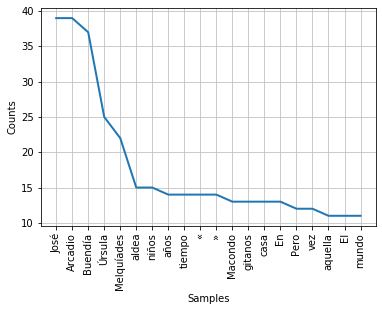

In [37]:
#graficando 
from nltk.probability import FreqDist
freq = nltk.FreqDist(documento_sinstop)
freq.plot(20)

In [18]:
# Como observamos antes de sacar las stopwords entre las primeras palabras ordenadas aparec+ian stopwords por eso las eliminamos para verificar previamente
# y luego se hará con los archivos qe se trabajará las matrices de co concordancia
for word in doc:
    if word.is_stop == True:
            print(word)

de
Muchos
después
al
de
el
había
de
aquella
tarde
en
que
su
lo
conocer
el
era
entonces
una
de
de
la
de
un
de
que
se
por
un
de
como
El
era
tan
que
muchas
cosas
de
para
había
que
con
el
Todos
los
por
el
de
una
de
su
cerca
de
la
con
un
de
conocer
los
nuevos
Primero
el
Un
de
de
que
se
con
el
de
hizo
una
de
lo
que
él
mismo
la
de
los
de
Fue
de
en
dos
todo
el
se
al
ver
que
los
las
las
los
se
de
su
las
por
la
de
los
los
de
aun
los
desde
mucho
tiempo
por
donde
más
se
les
había
se
en
detrás
de
los
de
Las
cosas
tienen
propia
el
con
todo
es
de
el
siempre
más
lejos
que
el
de
la
aun
más
del
la
que
era
posible
de
aquella
para
el
de
la
que
era
un
le
Para
eso
no
Pero
no
en
aquel
tiempo
en
la
de
los
así
que
su
una
de
por
los
dos
su
que
con
aquellos
para
el
no
Muy
pronto
ha
de
para
la
su
Durante
varios
se
en
el
de
sus
la
el
del
los
dos
de
en
el
de
Lo
que
fue
una
del
con
todas
sus
por
un
de
tenía
la
de
un
de
Cuando
los
cuatro
de
su
la
dentro
un
que
en
el
un
de
con
un
de
En
los
Esta
vez
un
una
del
de
un
qu

por
la
de
con
que
el
lugar
Nunca
ninguna
parte
ante
Aquí
nos
hemos
de
en
sin
los
de
la
Esa
varios
en
el
del
lo
el
de
un
lugar
más
Pero
esta
vez
se
sus
En
una
de
las
de
la
contra
la
de
sus
que
ya
para
la
no
en
qué
momento
ni
en
de
qué
sus
se
fueron
en
una
de
hasta
en
lo
con
una
hasta
por
él
un
poco
de
la
en
que
lo
en
el
del
entre
sus
de
mientras
en
sus
las
del
Lo
dejó
Lo
dejó
las
poner
sus
encima
con
un
sin
ningún
pero
ya
que
él
porque
se
lo
decir
en
sus
que
los
del
no
lo
en
su
Sólo
cuando
la
del
se
por
qué
lo
él
le
con
una
cierta
que
nadie
quiere
nos
solos
no
se
nos
Aquí
nos
porque
aquí
hemos
tenido
un
no
tenemos
un
Uno
no
es
de
ninguna
parte
mientras
no
tenga
un
bajo
la
con
una
es
que
yo
me
para
que
se
aquí
me
no
que
fuera
tan
la
de
su
de
con
el
de
su
con
la
de
un
donde
con
unos
en
la
para
que
las
del
donde
se
de
toda
de
para
el
Pero
fue

con
el
de
la
un
de
que
las
cosas
de
los
el
mayor
de
los
había
Tenía
la
el
el
de
su
Aunque
el
mismo
de
ya
desde
entonces
era
que
de
Fue
dado
durante


In [19]:
#la función para eliminar puntos y comas
import re, string
def remove_punctuation(text):
    return re.sub('[%s]' % re.escape(string.punctuation), ' ', text)

In [20]:
oraciones = [s for s in doc.sents]
print(len(oraciones))

223


In [34]:
#solo para saber las puntuaciones
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


# Armo el diccionario con los conteos de co-ocurrencia.

Miro una palabra a la izquierda y una a la derecha. Se agregan tokens de inicio y final de la oración.
Es importante mencionar que trabajaremos sólo con 2 oraciones.

In [21]:
print(oraciones[1:3])

[Macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos prehistóricos., El mundo era tan reciente, que muchas cosas carecían de nombre, y para mencionarlas había que señalarías con el dedo.]


In [22]:
#PRUEBA CON UNA FORMA DE TRABAJAR EL TEXTO
from nltk import sent_tokenize, word_tokenize
ora= "Macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos prehistóricos. El mundo era tan reciente, que muchas cosas carecían de nombre, y para mencionarlas había que señalarías con el dedo."
cleanora = remove_punctuation(ora)
b = [word_tokenize(sent) for sent in sent_tokenize(cleanora)]
b

[['Macondo',
  'era',
  'entonces',
  'una',
  'aldea',
  'de',
  'veinte',
  'casas',
  'de',
  'barro',
  'y',
  'cañabrava',
  'construidas',
  'a',
  'la',
  'orilla',
  'de',
  'un',
  'río',
  'de',
  'aguas',
  'diáfanas',
  'que',
  'se',
  'precipitaban',
  'por',
  'un',
  'lecho',
  'de',
  'piedras',
  'pulidas',
  'blancas',
  'y',
  'enormes',
  'como',
  'huevos',
  'prehistóricos',
  'El',
  'mundo',
  'era',
  'tan',
  'reciente',
  'que',
  'muchas',
  'cosas',
  'carecían',
  'de',
  'nombre',
  'y',
  'para',
  'mencionarlas',
  'había',
  'que',
  'señalarías',
  'con',
  'el',
  'dedo']]

In [23]:
cleanora

'Macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas que se precipitaban por un lecho de piedras pulidas  blancas y enormes como huevos prehistóricos  El mundo era tan reciente  que muchas cosas carecían de nombre  y para mencionarlas había que señalarías con el dedo '

In [24]:
b

[['Macondo',
  'era',
  'entonces',
  'una',
  'aldea',
  'de',
  'veinte',
  'casas',
  'de',
  'barro',
  'y',
  'cañabrava',
  'construidas',
  'a',
  'la',
  'orilla',
  'de',
  'un',
  'río',
  'de',
  'aguas',
  'diáfanas',
  'que',
  'se',
  'precipitaban',
  'por',
  'un',
  'lecho',
  'de',
  'piedras',
  'pulidas',
  'blancas',
  'y',
  'enormes',
  'como',
  'huevos',
  'prehistóricos',
  'El',
  'mundo',
  'era',
  'tan',
  'reciente',
  'que',
  'muchas',
  'cosas',
  'carecían',
  'de',
  'nombre',
  'y',
  'para',
  'mencionarlas',
  'había',
  'que',
  'señalarías',
  'con',
  'el',
  'dedo']]

In [76]:
#pruebo otro
dicc = [] # lista de diccionarios
lista = [] # lista de palabras
for sent in b:
    for m,tok in enumerate(sent):
        if m==0:
            toki = 'i'
        else :
            toki = sent[m-1]
        
        if m==len(sent)-1 :
            tokd = 'f'
        else :
            tokd = sent[m+1]
            
        if tok in lista:
            i = lista.index(tok)
            dicc[i][tok] +=1
        else :
            dicc.append({tok:1}) 
            lista.append(tok)
            i = lista.index(tok)

        if not toki in dicc[i]:
            dicc[i][toki] =1
        else:
            dicc[i][toki] +=1
                        
        if not tokd in dicc[i]:
            dicc[i][tokd] =1
        else:
            dicc[i][tokd] +=1

In [77]:
dicc


[{'Macondo': 1, 'i': 1, 'era': 1},
 {'era': 2, 'Macondo': 1, 'entonces': 1, 'mundo': 1, 'tan': 1},
 {'entonces': 1, 'era': 1, 'una': 1},
 {'una': 1, 'entonces': 1, 'aldea': 1},
 {'aldea': 1, 'una': 1, 'de': 1},
 {'de': 6,
  'aldea': 1,
  'veinte': 1,
  'casas': 1,
  'barro': 1,
  'orilla': 1,
  'un': 1,
  'río': 1,
  'aguas': 1,
  'lecho': 1,
  'piedras': 1,
  'carecían': 1,
  'nombre': 1},
 {'veinte': 1, 'de': 1, 'casas': 1},
 {'casas': 1, 'veinte': 1, 'de': 1},
 {'barro': 1, 'de': 1, 'y': 1},
 {'y': 3,
  'barro': 1,
  'cañabrava': 1,
  'blancas': 1,
  'enormes': 1,
  'nombre': 1,
  'para': 1},
 {'cañabrava': 1, 'y': 1, 'construidas': 1},
 {'construidas': 1, 'cañabrava': 1, 'a': 1},
 {'a': 1, 'construidas': 1, 'la': 1},
 {'la': 1, 'a': 1, 'orilla': 1},
 {'orilla': 1, 'la': 1, 'de': 1},
 {'un': 2, 'de': 1, 'río': 1, 'por': 1, 'lecho': 1},
 {'río': 1, 'un': 1, 'de': 1},
 {'aguas': 1, 'de': 1, 'diáfanas': 1},
 {'diáfanas': 1, 'aguas': 1, 'que': 1},
 {'que': 3,
  'diáfanas': 1,
  'se': 1,

In [78]:
from sklearn.feature_extraction import DictVectorizer

In [79]:
vec = DictVectorizer()
v = vec.fit_transform(dicc)
v 

<46x48 sparse matrix of type '<class 'numpy.float64'>'
	with 160 stored elements in Compressed Sparse Row format>

In [80]:
v.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
vec.get_feature_names()

['El',
 'Macondo',
 'a',
 'aguas',
 'aldea',
 'barro',
 'blancas',
 'carecían',
 'casas',
 'cañabrava',
 'como',
 'con',
 'construidas',
 'cosas',
 'de',
 'dedo',
 'diáfanas',
 'el',
 'enormes',
 'entonces',
 'era',
 'f',
 'había',
 'huevos',
 'i',
 'la',
 'lecho',
 'mencionarlas',
 'muchas',
 'mundo',
 'nombre',
 'orilla',
 'para',
 'piedras',
 'por',
 'precipitaban',
 'prehistóricos',
 'pulidas',
 'que',
 'reciente',
 'río',
 'se',
 'señalarías',
 'tan',
 'un',
 'una',
 'veinte',
 'y']

In [82]:
tabla = pd.DataFrame(v.toarray(), columns=vec.get_feature_names())
tabla

,El,Macondo,a,aguas,aldea,barro,blancas,carecían,casas,cañabrava,...,que,reciente,río,se,señalarías,tan,un,una,veinte,y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


In [83]:
lista = []
for dicc in dicc:
    lista.append(list(dicc.keys())[0])

In [84]:
matriz = tabla.set_axis(lista,axis=0, inplace=False)
matriz

,El,Macondo,a,aguas,aldea,barro,blancas,carecían,casas,cañabrava,...,que,reciente,río,se,señalarías,tan,un,una,veinte,y
Macondo,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
era,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
entonces,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
una,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
aldea,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
de,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
veinte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
casas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
barro,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
y,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0


# Para reducir dimensiones eliminamoslas stopwords

In [72]:
#SACO LAS STOPWORDS DE LAS ORACIONES
stop_wordses = set(stopwords.words('spanish'))
word_tokens1 = word_tokenize(oraci)

filtered_sentence1 = [w for w in word_tokens1 if not w in stop_wordses] 

  
filtered_sentence1 = [] 
  
for w in word_tokens1: 
    if w not in stop_wordses: 
        filtered_sentence1.append(w) 
  
print(word_tokens1) 




['Macondo', 'entonces', 'aldea', 'veinte', 'casas', 'barro', 'cañabrava', 'construidas', 'orilla', 'río', 'aguas', 'diáfanas', 'precipitaban', 'lecho', 'piedras', 'pulidas', 'blancas', 'enormes', 'huevos', 'prehistóricos', 'El', 'mundo', 'tan', 'reciente', 'muchas', 'cosas', 'carecían', 'nombre', 'mencionarlas', 'señalarías', 'dedo']


In [86]:
print(filtered_sentence1)

['Macondo', 'entonces', 'aldea', 'veinte', 'casas', 'barro', 'cañabrava', 'construidas', 'orilla', 'río', 'aguas', 'diáfanas', 'precipitaban', 'lecho', 'piedras', 'pulidas', 'blancas', 'enormes', 'huevos', 'prehistóricos', 'El', 'mundo', 'tan', 'reciente', 'muchas', 'cosas', 'carecían', 'nombre', 'mencionarlas', 'señalarías', 'dedo']


In [99]:
import re, string
def remove_punctuation(oraci):
    return re.sub('[%s]' % re.escape(string.punctuation), ' ', text)

In [102]:
#AHORA PRUEBO GENERAR la matriz con este archivo sin stopwords
oraci= "Macondo    entonces    aldea    veinte    casas    barro    cañabrava    construidas    orilla    río    aguas    diáfanas    precipitaban    lecho    piedras    pulidas    blancas    enormes    huevos    prehistóricos      El    mundo    tan    reciente    muchas    cosas    carecían    nombre    mencionarlas    señalarías    dedo "

h = [word_tokenize(sent) for sent in sent_tokenize(oraci)]
h


[['Macondo',
  'entonces',
  'aldea',
  'veinte',
  'casas',
  'barro',
  'cañabrava',
  'construidas',
  'orilla',
  'río',
  'aguas',
  'diáfanas',
  'precipitaban',
  'lecho',
  'piedras',
  'pulidas',
  'blancas',
  'enormes',
  'huevos',
  'prehistóricos',
  'El',
  'mundo',
  'tan',
  'reciente',
  'muchas',
  'cosas',
  'carecían',
  'nombre',
  'mencionarlas',
  'señalarías',
  'dedo']]

In [103]:
dicc = [] # lista de diccionarios
lista = [] # lista de palabras
for sent in h:
    for m,tok in enumerate(sent):
        if m==0:
            toki = 'i'
        else :
            toki = sent[m-1]
        
        if m==len(sent)-1 :
            tokd = 'f'
        else :
            tokd = sent[m+1]
            
        if tok in lista:
            i = lista.index(tok)
            dicc[i][tok] +=1
        else :
            dicc.append({tok:1}) 
            lista.append(tok)
            i = lista.index(tok)

        if not toki in dicc[i]:
            dicc[i][toki] =1
        else:
            dicc[i][toki] +=1
                        
        if not tokd in dicc[i]:
            dicc[i][tokd] =1
        else:
            dicc[i][tokd] +=1
                   

In [104]:
dicc

[{'Macondo': 1, 'i': 1, 'entonces': 1},
 {'entonces': 1, 'Macondo': 1, 'aldea': 1},
 {'aldea': 1, 'entonces': 1, 'veinte': 1},
 {'veinte': 1, 'aldea': 1, 'casas': 1},
 {'casas': 1, 'veinte': 1, 'barro': 1},
 {'barro': 1, 'casas': 1, 'cañabrava': 1},
 {'cañabrava': 1, 'barro': 1, 'construidas': 1},
 {'construidas': 1, 'cañabrava': 1, 'orilla': 1},
 {'orilla': 1, 'construidas': 1, 'río': 1},
 {'río': 1, 'orilla': 1, 'aguas': 1},
 {'aguas': 1, 'río': 1, 'diáfanas': 1},
 {'diáfanas': 1, 'aguas': 1, 'precipitaban': 1},
 {'precipitaban': 1, 'diáfanas': 1, 'lecho': 1},
 {'lecho': 1, 'precipitaban': 1, 'piedras': 1},
 {'piedras': 1, 'lecho': 1, 'pulidas': 1},
 {'pulidas': 1, 'piedras': 1, 'blancas': 1},
 {'blancas': 1, 'pulidas': 1, 'enormes': 1},
 {'enormes': 1, 'blancas': 1, 'huevos': 1},
 {'huevos': 1, 'enormes': 1, 'prehistóricos': 1},
 {'prehistóricos': 1, 'huevos': 1, 'El': 1},
 {'El': 1, 'prehistóricos': 1, 'mundo': 1},
 {'mundo': 1, 'El': 1, 'tan': 1},
 {'tan': 1, 'mundo': 1, 'reciente

In [105]:
vec = DictVectorizer()
v = vec.fit_transform(dicc)
v 

<31x33 sparse matrix of type '<class 'numpy.float64'>'
	with 93 stored elements in Compressed Sparse Row format>

In [106]:
v.toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [107]:
vec.get_feature_names()

['El',
 'Macondo',
 'aguas',
 'aldea',
 'barro',
 'blancas',
 'carecían',
 'casas',
 'cañabrava',
 'construidas',
 'cosas',
 'dedo',
 'diáfanas',
 'enormes',
 'entonces',
 'f',
 'huevos',
 'i',
 'lecho',
 'mencionarlas',
 'muchas',
 'mundo',
 'nombre',
 'orilla',
 'piedras',
 'precipitaban',
 'prehistóricos',
 'pulidas',
 'reciente',
 'río',
 'señalarías',
 'tan',
 'veinte']

In [108]:
tabla = pd.DataFrame(v.toarray(), columns=vec.get_feature_names())
tabla

,El,Macondo,aguas,aldea,barro,blancas,carecían,casas,cañabrava,construidas,...,orilla,piedras,precipitaban,prehistóricos,pulidas,reciente,río,señalarías,tan,veinte
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [109]:
lista = []
for dicc in dicc:
    lista.append(list(dicc.keys())[0])

In [110]:
matriz = tabla.set_axis(lista,axis=0, inplace=False)
matriz

,El,Macondo,aguas,aldea,barro,blancas,carecían,casas,cañabrava,construidas,...,orilla,piedras,precipitaban,prehistóricos,pulidas,reciente,río,señalarías,tan,veinte
Macondo,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
entonces,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aldea,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
veinte,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
casas,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
barro,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cañabrava,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
construidas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
orilla,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
río,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [111]:
from gensim.models.coherencemodel import CoherenceModel

In [112]:
from nltk.stem.porter import PorterStemmer

In [113]:
import matplotlib.pyplot as plt

In [114]:
from gensim.models import Word2Vec

In [116]:
#Luego creamos un archivo sin las stop word en español y mostramos el archivo con y sin stopwords
documento_sinstop = [w for w in doc_tokens if not w in stop_words] 
  
documento_sinstop = [] 
  
for w in doc_tokens: 
    if w not in stop_words: 
        documento_sinstop.append(w)

In [118]:
frases=['Gabriel', 'García', 'Márquez', 'Cien', 'años', 'soledad', 'I', 'Muchos', 'años', 'después', 'frente', 'pelotón', 'fusilamiento', 'coronel', 'Aureliano', 'Buendía', 'recordar', 'aquella', 'tarde', 'remota', 'padre', 'llevó', 'conocer', 'hielo', 'Macondo', 'entonces', 'aldea', 'veinte', 'casas', 'barro', 'cañabrava', 'construidas', 'orilla', 'río', 'aguas', 'diáfanas', 'precipitaban', 'lecho', 'piedras', 'pulidas', 'blancas', 'enormes', 'huevos', 'prehistóricos', 'El', 'mundo', 'tan', 'reciente', 'muchas', 'cosas', 'carecían', 'nombre', 'mencionarlas', 'señalarías', 'dedo', 'Todos', 'años', 'mes', 'marzo', 'familia', 'gitanos', 'desarrapados', 'plantaba', 'carpa', 'cerca', 'aldea', 'grande', 'alboroto', 'pitos', 'timbales', 'daban', 'conocer', 'nuevos', 'inventos', 'Primero', 'llevaron', 'imán', 'Un', 'gitano', 'corpulento', 'barba', 'montaraz', 'manos', 'gorrión', 'presentó', 'nombre', 'Melquiades', 'hizo', 'truculenta', 'demostración', 'pública', 'mismo', 'llamaba', 'octava', 'maravilla', 'sabios', 'alquimistas', 'Macedonia', 'Fue', 'casa', 'casa', 'arrastrando', 'dos', 'lingotes', 'metálicos', 'mundo', 'espantó', 'ver', 'calderos', 'pailas', 'tenazas', 'anafes', 'caían', 'sitio', 'maderas', 'crujían', 'desesperación', 'clavos', 'tornillos', 'tratando', 'desenclavarse', 'aun', 'objetos', 'perdidos', 'hacía', 'tiempo', 'aparecían', 'buscado', 'arrastraban', 'desbandada', 'turbulenta', 'detrás', 'fierros', 'mágicos', 'Melquíades', '«', 'Las', 'cosas', 'vida', 'propia', 'pregonaba', 'gitano', 'áspero', 'acento', 'cuestión', 'despertarles', 'ánima', '»', 'José', 'Arcadio', 'Buendía', 'cuya', 'desaforada', 'imaginación', 'iba', 'siempre', 'lejos', 'ingenio', 'naturaleza', 'aun', 'allá', 'milagro', 'magia', 'pensó', 'posible', 'servirse', 'aquella', 'invención', 'inútil', 'desentrañar', 'oro', 'tierra', 'Melquíades', 'hombre', 'honrado', 'previno', '«', 'Para', 'sirve', '»', 'Pero', 'José', 'Arcadio', 'Buendía', 'creía', 'aquel', 'tiempo', 'honradez', 'gitanos', 'así', 'cambió', 'mulo', 'partida', 'chivos', 'dos', 'lingotes', 'imantados', 'Úrsula', 'Iguarán', 'mujer', 'contaba', 'aquellos', 'animales', 'ensanchar', 'desmedrado', 'patrimonio', 'doméstico', 'consiguió', 'disuadirlo', '«', 'Muy', 'pronto', 'sobrarnos', 'oro', 'empedrar', 'casa', '»', 'replicó', 'marido', 'Durante', 'varios', 'meses', 'empeñó', 'demostrar', 'acierto', 'conjeturas', 'Exploró', 'palmo', 'palmo', 'región', 'inclusive', 'fondo', 'río', 'arrastrando', 'dos', 'lingotes', 'hierro', 'recitando', 'voz', 'alta', 'conjuro', 'Melquíades', 'Lo', 'único', 'logró', 'desenterrar', 'armadura', 'siglo', 'xv', 'todas', 'partes', 'soldadas', 'cascote', 'óxido', 'cuyo', 'interior', 'resonancia', 'hueca', 'enorme', 'calabazo', 'lleno', 'piedras', 'Cuando', 'José', 'Arcadio', 'Buendía', 'cuatro', 'hombres', 'expedición', 'lograron', 'desarticular', 'armadura', 'encontraron', 'dentro', 'esqueleto', 'calcificado', 'llevaba', 'colgado', 'cuello', 'relicario', 'cobre', 'rizo', 'mujer', 'En', 'marzo', 'volvieron', 'gitanos', 'Esta', 'vez', 'llevaban', 'catalejo', 'lupa', 'tamaño', 'tambor', 'exhibieron', 'último', 'descubrimiento', 'judíos', 'Amsterdam', 'Sentaron', 'gitana', 'extremo', 'aldea', 'instalaron', 'catalejo', 'entrada', 'carpa', 'Mediante', 'pago', 'cinco', 'reales', 'gente', 'asomaba', 'catalejo', 'veía', 'gitana', 'alcance', 'mano', '«', 'La', 'ciencia', 'eliminado', 'distancias', '»', 'pregonaba', 'Melquíades', '«', 'Dentro', 'hombre', 'podrá', 'ver', 'ocurre', 'cualquier', 'lugar', 'tierra', 'moverse', 'casa', '»', 'Un', 'mediodía', 'ardiente', 'hicieron', 'asombrosa', 'demostración', 'lupa', 'gigantesca', 'pusieron', 'montón', 'hierba', 'seca', 'mitad', 'calle', 'prendieron', 'fuego', 'mediante', 'concentración', 'rayos', 'solares', 'José', 'Arcadio', 'Buendía', 'aún', 'acababa', 'consolarse', 'fracaso', 'imanes', 'concibió', 'idea', 'utilizar', 'aquel', 'invento', 'arma', 'guerra', 'Melquíades', 'vez', 'trató', 'disuadirlo', 'Pero', 'terminó', 'aceptar', 'dos', 'lingotes', 'imantados', 'tres', 'piezas', 'dinero', 'colonial', 'cambio', 'lupa', 'Úrsula', 'lloró', 'consternación', 'Aquel', 'dinero', 'formaba', 'parte', 'cofre', 'monedas', 'oro', 'padre', 'acumulado', 'toda', 'vida', 'privaciones', 'enterrado', 'debajo', 'cama', 'espera', 'buena', 'ocasión', 'invertirías', 'José', 'Arcadio', 'Buendía', 'trató', 'siquiera', 'consolarla', 'entregado', 'entero', 'experimentos', 'tácticos', 'abnegación', 'científico', 'aun', 'riesgo', 'propia', 'vida', 'Tratando', 'demostrar', 'efectos', 'lupa', 'tropa', 'enemiga', 'expuso', 'mismo', 'concentración', 'rayos', 'solares', 'sufrió', 'quemaduras', 'convirtieron', 'úlceras', 'tardaron', 'tiempo', 'sanar', 'Ante', 'protestas', 'mujer', 'alarmada', 'tan', 'peligrosa', 'inventiva', 'punto', 'incendiar', 'casa', 'Pasaba', 'largas', 'horas', 'cuarto', 'haciendo', 'cálculos', 'posibilidades', 'estratégicas', 'arma', 'novedosa', 'logró', 'componer', 'manual', 'asombrosa', 'claridad', 'didáctica', 'poder', 'convicción', 'irresistible', 'Lo', 'envió', 'autoridades', 'acompañado', 'numerosos', 'testimonios', 'experiencias', 'varios', 'pliegos', 'dibujos', 'explicativos', 'cuidado', 'mensajero', 'atravesó', 'sierra', 'extravió', 'pantanos', 'desmesurados', 'remontó', 'ríos', 'tormentosos', 'punto', 'perecer', 'bajo', 'azote', 'fieras', 'desesperación', 'peste', 'conseguir', 'ruta', 'enlace', 'mulas', 'correo', 'A', 'pesar', 'viaje', 'capital', 'aquel', 'tiempo', 'menos', 'imposible', 'José', 'Arcadio', 'Buendia', 'prometía', 'intentarlo', 'tan', 'pronto', 'ordenara', 'gobierno', 'fin', 'hacer', 'demostraciones', 'prácticas', 'invento', 'poderes', 'militares', 'adiestrarlos', 'personalmente', 'complicadas', 'artes', 'guerra', 'solar', 'Durante', 'varios', 'años', 'esperó', 'respuesta', 'Por', 'último', 'cansado', 'esperar', 'lamentó', 'Melquíades', 'fracaso', 'iniciativa', 'gitano', 'dio', 'entonces', 'prueba', 'convincente', 'honradez', 'devolvió', 'doblones', 'cambio', 'lupa', 'dejó', 'además', 'mapas', 'portugueses', 'varios', 'instrumentos', 'navegación', 'De', 'puño', 'letra', 'escribió', 'apretada', 'síntesis', 'estudios', 'monje', 'Hermann', 'dejó', 'disposición', 'pudiera', 'servirse', 'astrolabio', 'brújula', 'sextante', 'José', 'Arcadio', 'Buendía', 'pasó', 'largos', 'meses', 'lluvia', 'encerrado', 'cuartito', 'construyó', 'fondo', 'casa', 'nadie', 'perturbara', 'experimentos', 'Habiendo', 'abandonado', 'completo', 'obligaciones', 'domésticas', 'permaneció', 'noches', 'enteras', 'patio', 'vigilando', 'curso', 'astros', 'punto', 'contraer', 'insolación', 'tratar', 'establecer', 'método', 'exacto', 'encontrar', 'mediodía', 'Cuando', 'hizo', 'experto', 'uso', 'manejo', 'instrumentos', 'noción', 'espacio', 'permitió', 'navegar', 'mares', 'incógnitos', 'visitar', 'territorios', 'deshabitados', 'trabar', 'relación', 'seres', 'espléndidos', 'necesidad', 'abandonar', 'gabinete', 'Fue', 'ésa', 'época', 'adquirió', 'hábito', 'hablar', 'solas', 'paseándose', 'casa', 'hacer', 'caso', 'nadie', 'mientras', 'Úrsula', 'niños', 'partían', 'espinazo', 'huerta', 'cuidando', 'plátano', 'malanga', 'yuca', 'ñame', 'ahuyama', 'berenjena', 'De', 'pronto', 'ningún', 'anuncio', 'actividad', 'febril', 'interrumpió', 'sustituida', 'especie', 'fascinación', 'Estuvo', 'varios', 'días', 'hechizado', 'repitiéndose', 'mismo', 'voz', 'baja', 'sartal', 'asombrosas', 'conjeturas', 'dar', 'crédito', 'propio', 'entendimiento', 'Por', 'fin', 'martes', 'diciembre', 'hora', 'almuerzo', 'soltó', 'golpe', 'toda', 'carga', 'tormento', 'Los', 'niños', 'recordar', 'resto', 'vida', 'augusta', 'solemnidad', 'padre', 'sentó', 'cabecera', 'mesa', 'temblando', 'fiebre', 'devastado', 'prolongada', 'vigilia', 'encono', 'imaginación', 'reveló', 'descubrimiento', 'La', 'tierra', 'redonda', 'naranja', 'Úrsula', 'perdió', 'paciencia', '«', 'Si', 'volverte', 'loco', 'vuélvete', 'solo', 'gritó', 'Pero', 'trates', 'inculcar', 'niños', 'ideas', 'gitano', '»', 'José', 'Arcadio', 'Buendía', 'impasible', 'dejó', 'amedrentar', 'desesperación', 'mujer', 'rapto', 'cólera', 'destrozó', 'astrolabio', 'suelo', 'Construyó', 'reunió', 'cuartito', 'hombres', 'pueblo', 'demostró', 'teorías', 'resultaban', 'incomprensibles', 'posibilidad', 'regresar', 'punto', 'partida', 'navegando', 'siempre', 'hacia', 'Oriente', 'Toda', 'aldea', 'convencida', 'José', 'Arcadio', 'Buendía', 'perdido', 'juicio', 'llegó', 'Melquíades', 'poner', 'cosas', 'punto', 'Exaltó', 'público', 'inteligencia', 'aquel', 'hombre', 'pura', 'especulación', 'astronómica', 'construido', 'teoría', 'comprobada', 'práctica', 'aunque', 'desconocida', 'entonces', 'Macondo', 'prueba', 'admiración', 'hizo', 'regalo', 'ejercer', 'influencia', 'terminante', 'futuro', 'aldea', 'laboratorio', 'alquimia', 'Para', 'época', 'Melquíades', 'envejecido', 'rapidez', 'asombrosa', 'En', 'primeros', 'viajes', 'parecía', 'tener', 'misma', 'edad', 'José', 'Arcadio', 'Buendia', 'Pero', 'mientras', 'éste', 'conservaba', 'fuerza', 'descomunal', 'permitía', 'derribar', 'caballo', 'agarrándolo', 'orejas', 'gitano', 'parecía', 'estragado', 'dolencia', 'tenaz', 'Era', 'realidad', 'resultado', 'múltiples', 'raras', 'enfermedades', 'contraídas', 'incontables', 'viajes', 'alrededor', 'mundo', 'Según', 'mismo', 'contó', 'José', 'Arcadio', 'Buendia', 'mientras', 'ayudaba', 'montar', 'laboratorio', 'muerte', 'seguía', 'todas', 'partes', 'husmeándole', 'pantalones', 'decidirse', 'darle', 'zarpazo', 'final', 'Era', 'fugitivo', 'cuantas', 'plagas', 'catástrofes', 'flagelado', 'género', 'humano', 'Sobrevivió', 'pelagra', 'Persia', 'escorbuto', 'archipiélago', 'Malasia', 'lepra', 'Alejandría', 'beriberi', 'Japón', 'peste', 'bubónica', 'Madagascar', 'terremoto', 'Sicilia', 'naufragio', 'multitudinario', 'estrecho', 'Magallanes', 'Aquel', 'ser', 'prodigioso', 'decía', 'poseer', 'claves', 'Nostradamus', 'hombre', 'lúgubre', 'envuelto', 'aura', 'triste', 'mirada', 'asiática', 'parecía', 'conocer', 'lado', 'cosas', 'Usaba', 'sombrero', 'grande', 'negro', 'alas', 'extendidas', 'cuervo', 'chaleco', 'terciopelo', 'patinado', 'verdín', 'siglos', 'Pero', 'pesar', 'inmensa', 'sabiduría', 'ámbito', 'misterioso', 'peso', 'humano', 'condición', 'terrestre', 'mantenía', 'enredado', 'minúsculos', 'problemas', 'vida', 'cotidiana', 'Se', 'quejaba', 'dolencias', 'viejo', 'sufría', 'insignificantes', 'percances', 'económicos', 'dejado', 'reír', 'hacía', 'tiempo', 'escorbuto', 'arrancado', 'dientes', 'El', 'sofocante', 'mediodía', 'reveló', 'secretos', 'José', 'Arcadio', 'Buendía', 'certidumbre', 'aquél', 'principio', 'grande', 'amistad', 'Los', 'niños', 'asombraron', 'relatos', 'fantásticos', 'Aureliano', 'entonces', 'cinco', 'años', 'recordarlo', 'resto', 'vida', 'vio', 'aquella', 'tarde', 'sentado', 'claridad', 'metálica', 'reverberante', 'ventana', 'alumbrando', 'pro', 'funda', 'voz', 'órgano', 'territorios', 'oscuros', 'imaginación', 'mientras', 'chorreaba', 'sienes', 'grasa', 'derretida', 'calor', 'José', 'Arcadio', 'hermano', 'mayor', 'transmitir', 'aquella', 'imagen', 'maravillosa', 'recuerdo', 'hereditario', 'toda', 'descendencia', 'Úrsula', 'cambio', 'conservó', 'mal', 'recuerdo', 'aquella', 'visita', 'entró', 'cuarto', 'momento', 'Melquíades', 'rompió', 'distracción', 'frasco', 'bicloruro', 'mercurio', 'Es', 'olor', 'demonio', 'dijo', 'En', 'absoluto', 'corrigió', 'Melquíades', 'Está', 'comprobado', 'demonio', 'propiedades', 'sulfúricas', 'solimán', 'Siempre', 'didáctico', 'hizo', 'sabia', 'exposición', 'virtudes', 'diabólicas', 'cinabrio', 'Úrsula', 'hizo', 'caso', 'sino', 'llevó', 'niños', 'rezar', 'Aquel', 'olor', 'mordiente', 'quedaría', 'siempre', 'memoria', 'vinculado', 'recuerdo', 'Melquíades', 'El', 'rudimentario', 'laboratorio', 'contar', 'profusión', 'cazuelas', 'embudos', 'retortas', 'filtros', 'coladores', 'compuesto', 'atanor', 'primitivo', 'probeta', 'cristal', 'cuello', 'largo', 'angosto', 'imitación', 'huevo', 'filosófico', 'destilador', 'construido', 'propios', 'gitanos', 'según', 'descripciones', 'modernas', 'alambique', 'tres', 'brazos', 'María', 'judía', 'Además', 'cosas', 'Melquíades', 'dejó', 'muestras', 'siete', 'metales', 'correspondientes', 'siete', 'planetas', 'fórmulas', 'Moisés', 'Zósimo', 'doblado', 'oro', 'serie', 'apuntes', 'dibujos', 'procesos', 'Gran', 'Magisterio', 'permitían', 'supiera', 'interpretarlos', 'intentar', 'fabricación', 'piedra', 'filosofal', 'Seducido', 'simplicidad', 'fórmulas', 'doblar', 'oro', 'José', 'Arcadio', 'Buendía', 'cortejó', 'Úrsula', 'varias', 'semanas', 'permitiera', 'desenterrar', 'monedas', 'coloniales', 'aumentarlas', 'tantas', 'veces', 'posible', 'subdividir', 'azogile', 'Úrsula', 'cedió', 'ocurría', 'siempre', 'inquebrantable', 'obstinación', 'marido', 'Entonces', 'José', 'Arcadio', 'Buendía', 'echó', 'treinta', 'doblones', 'cazuela', 'fundió', 'raspadura', 'cobre', 'oropimente', 'azufre', 'plomo', 'Puso', 'hervir', 'fuego', 'vivo', 'caldero', 'aceite', 'ricino', 'obtener', 'jarabe', 'espeso', 'pestilente', 'parecido', 'caramelo', 'vulgar', 'oro', 'magnífico', 'En', 'azarosos', 'desesperados', 'procesos', 'destilación', 'fundida', 'siete', 'metales', 'planetarios', 'trabajada', 'mercurio', 'hermético', 'vitriolo', 'Chipre', 'vuelta', 'cocer', 'manteca', 'cerdo', 'falta', 'aceite', 'rábano', 'preciosa', 'herencia', 'Úrsula', 'quedó', 'reducida', 'chicharrón', 'carbonizado', 'pudo', 'ser', 'desprendido', 'fondo', 'caldero', 'Cuando', 'volvieron', 'gitanos', 'Úrsula', 'predispuesto', 'toda', 'población', 'Pero', 'curiosidad', 'pudo', 'temor', 'aquella', 'vez', 'gitanos', 'recorrieron', 'aldea', 'haciendo', 'ruido', 'ensordecedor', 'toda', 'clase', 'instrumentos', 'músicos', 'mientras', 'pregonero', 'anunciaba', 'exhibición', 'fabuloso', 'hallazgo', 'nasciancenos', 'De', 'modo', 'mundo', 'carpa', 'mediante', 'pago', 'centavo', 'vieron', 'Melquíades', 'juvenil', 'repuesto', 'desarrugado', 'dentadura', 'nueva', 'radiante', 'Quienes', 'recordaban', 'encías', 'destruidas', 'escorbuto', 'mejillas', 'fláccidas', 'labios', 'marchitos', 'estremecieron', 'pavor', 'aquella', 'prueba', 'terminante', 'poderes', 'sobrenaturales', 'gitano', 'El', 'pavor', 'convirtió', 'pánico', 'Melquíades', 'sacó', 'dientes', 'intactos', 'engastados', 'encías', 'mostró', 'público', 'instante', 'instante', 'fugaz', 'volvió', 'ser', 'mismo', 'hombre', 'decrépito', 'años', 'anteriores', 'puso', 'vez', 'sonrió', 'nuevo', 'dominio', 'pleno', 'juventud', 'restaurada', 'Hasta', 'propio', 'José', 'Arcadio', 'Buendía', 'consideró', 'conocimientos', 'Melquíades', 'llegado', 'extremos', 'intolerables', 'experimentó', 'saludable', 'alborozo', 'gitano', 'explicó', 'solas', 'mecanismo', 'dentadura', 'postiza', 'Aquello', 'pareció', 'vez', 'tan', 'sencillo', 'prodigioso', 'noche', 'mañana', 'perdió', 'interés', 'investigaciones', 'alquimia', 'sufrió', 'nueva', 'crisis', 'mal', 'humor', 'volvió', 'comer', 'forma', 'regular', 'pasaba', 'día', 'dando', 'vueltas', 'casa', '«', 'En', 'mundo', 'ocurriendo', 'cosas', 'increíbles', 'decía', 'Úrsula', 'Ahí', 'mismo', 'lado', 'río', 'toda', 'clase', 'aparatos', 'mágicos', 'mientras', 'seguimos', 'viviendo', 'burros', '»', 'Quienes', 'conocían', 'tiempos', 'fundación', 'Macondo', 'asombraban', 'cuánto', 'cambiado', 'bajo', 'influencia', 'Melquíades', 'Al', 'principio', 'José', 'Arcadio', 'Buendía', 'especie', 'patriarca', 'juvenil', 'daba', 'instrucciones', 'siembra', 'consejos', 'crianza', 'niños', 'animales', 'colaboraba', 'aun', 'trabajo', 'físico', 'buena', 'marcha', 'comunidad', 'Puesto', 'casa', 'primer', 'momento', 'mejor', 'aldea', 'arregladas', 'imagen', 'semejanza', 'Tenía', 'salita', 'amplia', 'bien', 'iluminada', 'comedor', 'forma', 'terraza', 'flores', 'colores', 'alegres', 'dos', 'dormitorios', 'patio', 'castaño', 'gigantesco', 'huerto', 'bien', 'plantado', 'corral', 'vivían', 'comunidad', 'pacífica', 'chivos', 'cerdos', 'gallinas', 'Los', 'únicos', 'animales', 'prohibidos', 'sólo', 'casa', 'sino', 'poblado', 'gallos', 'pelea', 'La', 'laboriosidad', 'Úrsula', 'andaba', 'par', 'marido', 'Activa', 'menuda', 'severa', 'aquella', 'mujer', 'nervios', 'inquebrantables', 'ningún', 'momento', 'vida', 'oyó', 'cantar', 'parecía', 'todas', 'partes', 'amanecer', 'entrada', 'noche', 'siempre', 'perseguida', 'suave', 'susurro', 'pollerines', 'olán', 'Gracias', 'pisos', 'tierra', 'golpeada', 'muros', 'barro', 'encalar', 'rústicos', 'muebles', 'madera', 'construidos', 'mismos', 'siempre', 'limpios', 'viejos', 'arcones', 'guardaba', 'ropa', 'exhalaban', 'tibio', 'olor', 'albahaca', 'José', 'Arcadio', 'Buendía', 'hombre', 'emprendedor', 'vería', 'jamás', 'aldea', 'dispuesto', 'tal', 'modo', 'posición', 'casas', 'todas', 'podía', 'llegarse', 'río', 'abastecerse', 'agua', 'igual', 'esfuerzo', 'trazó', 'calles', 'tan', 'buen', 'ninguna', 'casa', 'recibía', 'sol', 'hora', 'calor', 'En', 'pocos', 'años', 'Macondo', 'aldea', 'ordenada', 'laboriosa', 'cualquiera', 'conocidas', 'entonces', '300', 'habitantes', 'Era', 'verdad', 'aldea', 'feliz', 'nadie', 'mayor', 'treinta', 'años', 'nadie', 'muerto', 'Desde', 'tiempos', 'fundación', 'José', 'Arcadio', 'Buendía', 'construyó', 'trampas', 'jaulas', 'En', 'tiempo', 'llenó', 'turpiales', 'canarios', 'azulejos', 'petirrojos', 'sólo', 'propia', 'casa', 'sino', 'todas', 'aldea', 'El', 'concierto', 'tantos', 'pájaros', 'distintos', 'llegó', 'ser', 'tan', 'aturdidor', 'Úrsula', 'tapó', 'oídos', 'cera', 'abejas', 'perder', 'realidad', 'La', 'primera', 'vez', 'llegó', 'tribu', 'Melquíades', 'vendiendo', 'bolas', 'vidrio', 'dolor', 'cabeza', 'mundo', 'sorprendió', 'podido', 'encontrar', 'aquella', 'aldea', 'perdida', 'sopor', 'ciénaga', 'gitanos', 'confesaron', 'orientado', 'canto', 'pájaros', 'Aquel', 'espíritu', 'iniciativa', 'social', 'desapareció', 'tiempo', 'arrastrado', 'fiebre', 'imanes', 'cálculos', 'astronómicos', 'sueños', 'trasmutación', 'ansias', 'conocer', 'maravillas', 'mundo', 'De', 'emprendedor', 'limpio', 'José', 'Arcadio', 'Buendía', 'convirtió', 'hombre', 'aspecto', 'holgazán', 'descuidado', 'vestir', 'barba', 'salvaje', 'Úrsula', 'lograba', 'cuadrar', 'duras', 'penas', 'cuchillo', 'cocina', 'No', 'faltó', 'considerara', 'víctima', 'algún', 'extraño', 'sortilegio', 'Pero', 'convencidos', 'locura', 'abandonaron', 'trabajo', 'familias', 'seguirlo', 'echó', 'hombro', 'herramientas', 'desmontar', 'pidió', 'concurso', 'abrir', 'trocha', 'pusiera', 'Macondo', 'contacto', 'grandes', 'inventos', 'José', 'Arcadio', 'Buendía', 'ignoraba', 'completo', 'geografía', 'región', 'Sabía', 'hacia', 'Oriente', 'sierra', 'impenetrable', 'lado', 'sierra', 'antigua', 'ciudad', 'Riohacha', 'épocas', 'pasadas', 'según', 'contado', 'primer', 'Aureliano', 'Buendía', 'abuelo', 'sir', 'Francis', 'Drake', 'daba', 'deporte', 'cazar', 'caimanes', 'cañonazos', 'luego', 'hacía', 'remendar', 'rellenar', 'paja', 'llevárselos', 'reina', 'Isabel', 'En', 'juventud', 'hombres', 'mujeres', 'niños', 'animales', 'toda', 'clase', 'enseres', 'domésticos', 'atravesaron', 'sierra', 'buscando', 'salida', 'mar', 'cabo', 'veintiséis', 'meses', 'desistieron', 'empresa', 'fundaron', 'Macondo', 'tener', 'emprender', 'camino', 'regreso', 'Era', 'pues', 'ruta', 'interesaba', 'sólo', 'podía', 'conducirlo', 'pasado', 'Al', 'sur', 'pantanos', 'cubiertos', 'eterna', 'nata', 'vegetal', 'vasto', 'universo', 'ciénaga', 'grande', 'según', 'testimonio', 'gitanos', 'carecía', 'límites', 'La', 'ciénaga', 'grande', 'confundía', 'Occidente', 'extensión', 'acuática', 'horizontes', 'cetáceos', 'piel', 'delicada', 'cabeza', 'torso', 'mujer', 'perdían', 'navegantes', 'hechizo', 'tetas', 'descomunales', 'Los', 'gitanos', 'navegaban', 'seis', 'meses', 'ruta', 'alcanzar', 'cinturón', 'tierra', 'firme', 'pasaban', 'mulas', 'correo', 'De', 'acuerdo', 'cálculos', 'José', 'Arcadio', 'Buendía', 'única', 'posibilidad', 'contacto', 'civilización', 'ruta', 'Norte', 'De', 'modo', 'dotó', 'herramientas', 'desmonte', 'armas', 'cacería', 'mismos', 'hombres', 'acompañaron', 'fundación', 'Macondo', 'echó', 'mochila', 'instrumentos', 'orientación', 'mapas', 'emprendió', 'temeraria', 'aventura', 'Los', 'primeros', 'días', 'encontraron', 'obstáculo', 'apreciable', 'Descendieron', 'pedregosa', 'ribera', 'río', 'lugar', 'años', 'encontrado', 'armadura', 'guerrero', 'allí', 'penetraron', 'bosque', 'sendero', 'naranjos', 'silvestres', 'Al', 'término', 'primera', 'semana', 'mataron', 'asaron', 'venado', 'conformaron', 'comer', 'mitad', 'salar', 'resto', 'próximos', 'días', 'Trataban', 'aplazar', 'precaución', 'necesidad', 'seguir', 'comiendo', 'guacamayas', 'cuya', 'carne', 'azul', 'áspero', 'sabor', 'almizcle', 'Luego', 'diez', 'días', 'volvieron', 'ver', 'sol', 'El', 'suelo', 'volvió', 'blando', 'húmedo', 'ceniza', 'volcánica', 'vegetación', 'cada', 'vez', 'insidiosa', 'hicieron', 'cada', 'vez', 'lejanos', 'gritos', 'pájaros', 'bullaranga', 'monos', 'mundo', 'volvió', 'triste', 'siempre', 'Los', 'hombres', 'expedición', 'sintieron', 'abrumados', 'recuerdos', 'antiguos', 'aquel', 'paraíso', 'humedad', 'silencio', 'anterior', 'pecado', 'original', 'botas', 'hundían', 'pozos', 'aceites', 'humeantes', 'machetes', 'destrozaban', 'lirios', 'sangrientos', 'salamandras', 'doradas', 'Durante', 'semana', 'casi', 'hablar', 'avanzaron', 'sonámbulos', 'universo', 'pesadumbre', 'alumbrados', 'apenas', 'tenue', 'reverberación', 'insectos', 'luminosos', 'pulmones', 'agobiados', 'sofocante', 'olor', 'sangre', 'No', 'podían', 'regresar', 'trocha', 'iban', 'abriendo', 'paso', 'volvía', 'cerrar', 'tiempo', 'vegetación', 'nueva', 'casi', 'veían', 'crecer', 'ojos', '«', 'No', 'importa', 'decía', 'José', 'Arcadio', 'Buendía', 'Lo', 'esencial', 'perder', 'orientación', '»', 'Siempre', 'pendiente', 'brújula', 'siguió', 'guiando', 'hombres', 'hacia', 'norte', 'invisible', 'lograron', 'salir', 'región', 'encantada', 'Era', 'noche', 'densa', 'estrellas', 'oscuridad', 'impregnada', 'aire', 'nuevo', 'limpio', 'Agotados', 'prolongada', 'travesía', 'colgaron', 'hamacas', 'durmieron', 'fondo', 'primera', 'vez', 'dos', 'semanas', 'Cuando', 'despertaron', 'sol', 'alto', 'quedaron', 'pasmados', 'fascinación', 'Frente', 'rodeado', 'helechos', 'palmeras', 'blanco', 'polvoriento', 'silenciosa', 'luz', 'mañana', 'enorme', 'galeón', 'español', 'Ligeramente', 'volteado', 'estribor', 'arboladura', 'intacta', 'colgaban', 'piltrafas', 'escuálidas', 'velamen', 'jarcias', 'adornadas', 'orquídeas', 'El', 'casco', 'cubierto', 'tersa', 'coraza', 'rémora', 'petrificada', 'musgo', 'tierno', 'firmemente', 'enclavado', 'suelo', 'piedras', 'Toda', 'estructura', 'parecía', 'ocupar', 'ámbito', 'propio', 'espacio', 'soledad', 'olvido', 'vedado', 'vicios', 'tiempo', 'costumbres', 'pájaros', 'En', 'interior', 'expedicionarios', 'exploraron', 'fervor', 'sigiloso', 'apretado', 'bosque', 'flores', 'El', 'hallazgo', 'galeón', 'indicio', 'proximidad', 'mar', 'quebrantó', 'ímpetu', 'José', 'Arcadio', 'Buendía', 'Consideraba', 'burla', 'travieso', 'destino', 'haber', 'buscado', 'mar', 'contrarlo', 'precio', 'sacrificios', 'penalidades', 'cuento', 'haberlo', 'encontrado', 'entonces', 'buscarlo', 'atravesado', 'camino', 'obstáculo', 'insalvable', 'Muchos', 'años', 'después', 'coronel', 'Aureliano', 'Buendía', 'volvió', 'travesar', 'región', 'ruta', 'regular', 'correo', 'único', 'encontró', 'nave', 'costillar', 'carbonizado', 'medio', 'campo', 'amapolas', 'Sólo', 'entonces', 'convencido', 'aquella', 'historia', 'sido', 'engendro', 'imaginación', 'padre', 'preguntó', 'cómo', 'podido', 'galeón', 'adentrarse', 'punto', 'tierra', 'firme', 'Pero', 'José', 'Arcadio', 'Buendía', 'planteó', 'inquietud', 'encontró', 'mar', 'cabo', 'cuatro', 'días', 'viaje', 'doce', 'kilómetros', 'distancia', 'galeón', 'Sus', 'sueños', 'terminaban', 'frente', 'mar', 'color', 'ceniza', 'espumoso', 'sucio', 'merecía', 'riesgos', 'sacrificios', 'aventura', '¡Carajo', 'gritó', 'Macondo', 'rodeado', 'agua', 'todas', 'partes', 'La', 'idea', 'Macondo', 'peninsular', 'prevaleció', 'tiempo', 'inspirada', 'mapa', 'arbitrario', 'dibujó', 'José', 'Arcadio', 'Buendía', 'regreso', 'expedición', 'Lo', 'trazó', 'rabia', 'exa', 'gerando', 'mala', 'fe', 'dificultades', 'comunicación', 'castigarse', 'mismo', 'absoluta', 'falta', 'eligió', 'lugar', '«', 'Nunca', 'llegaremos', 'ninguna', 'parte', 'mentaba', 'Úrsula', 'Aquí', 'pudrir', 'vida', 'recibir', 'beneficios', 'ciencia', '»', 'Esa', 'certidumbre', 'rumiada', 'varios', 'meses', 'cuartito', 'laboratorio', 'llevó', 'concebir', 'proyecto', 'trasladar', 'Macondo', 'lugar', 'propicio', 'Pero', 'vez', 'Úrsula', 'anticipó', 'designios', 'febriles', 'En', 'secreta', 'implacable', 'labor', 'hormiguita', 'predispuso', 'mujeres', 'aldea', 'veleidad', 'hombres', 'empezaban', 'prepararse', 'mudanza', 'José', 'Arcadio', 'Buendía', 'supo', 'momento', 'virtud', 'fuerzas', 'adversas', 'planes', 'enredando', 'maraña', 'pretextos', 'contratiempos', 'evasivas', 'convertirse', 'pura', 'simple', 'ilusión', 'Úrsula', 'observó', 'atención', 'inocente', 'sintió', 'piedad', 'mañana', 'encontró', 'cuartito', 'fondo', 'comentando', 'dientes', 'sueños', 'mudanza', 'mientras', 'colocaba', 'cajas', 'originales', 'piezas', 'laboratorio', 'Lo', 'dejó', 'terminar', 'Lo', 'dejó', 'clavar', 'cajas', 'poner', 'iniciales', 'encima', 'hisopo', 'entintado', 'cerle', 'ningún', 'reproche', 'sabiendo', 'sabía', 'oyó', 'decir', 'sordos', 'monólogos', 'hombres', 'pueblo', 'secundarían', 'empresa', 'Sólo', 'empezó', 'desmontar', 'puerta', 'cuartito', 'Úrsula', 'atrevió', 'preguntarle', 'hacía', 'contestó', 'cierta', 'amargura', '«', 'Puesto', 'nadie', 'quiere', 'irse', 'iremos', 'solos', '»', 'Úrsula', 'alteró', 'No', 'iremos', 'dijo', 'Aquí', 'quedamos', 'aquí', 'hijo', 'Todavía', 'muerto', 'dijo', 'Uno', 'ninguna', 'parte', 'mientras', 'muerto', 'bajo', 'tierra', 'Úrsula', 'replicó', 'suave', 'firmeza', 'Si', 'necesario', 'muera', 'queden', 'aquí', 'muero', 'José', 'Arcadio', 'Buendía', 'creyó', 'tan', 'rígida', 'voluntad', 'mujer', 'Trató', 'seducirla', 'hechizo', 'fantasía', 'promesa', 'mundo', 'prodigioso', 'bastaba', 'echar', 'líquidos', 'mágicos', 'tierra', 'plantas', 'dieran', 'frutos', 'voluntad', 'hombre', 'vendían', 'precio', 'baratillo', 'toda', 'clase', 'aparatos', 'dolor', 'Pero', 'Úrsula', 'insensible', 'clarividencia', 'En', 'vez', 'andar', 'pensando', 'alocadas', 'novelerías', 'debes', 'ocuparte', 'hijos', 'replicó', 'Míralos', 'cómo', 'abandonados', 'buena', 'Dios', 'igual', 'burros', 'José', 'Arcadio', 'Buendía', 'tomó', 'pie', 'letra', 'palabras', 'mujer', 'Miró', 'través', 'ventana', 'vio', 'dos', 'niños', 'descalzos', 'huerta', 'soleada', 'impresión', 'sólo', 'aquel', 'instante', 'empezado', 'existir', 'concebidos', 'conjuro', 'Úrsula', 'Algo', 'ocurrió', 'entonces', 'interior', 'misterioso', 'definitivo', 'desarraigó', 'tiempo', 'actual', 'llevó', 'deriva', 'región', 'inexplorada', 're', 'cuerdos', 'Mientras', 'Úrsula', 'seguía', 'barriendo', 'casa', 'ahora', 'segura', 'abandonar', 'resto', 'vida', 'permaneció', 'contemplando', 'niños', 'mirada', 'absorta', 'ojos', 'humedecieron', 'secó', 'dorso', 'mano', 'exhaló', 'hondo', 'suspiro', 'resignación', 'Bueno', 'dijo', 'Diles', 'vengan', 'ayudarme', 'sacar', 'cosas', 'cajones', 'José', 'Arcadio', 'mayor', 'niños', 'cumplido', 'catorce', 'años', 'Tenía', 'cabeza', 'cuadrada', 'pelo', 'hirsuto', 'carácter', 'voluntarioso', 'padre', 'Aunque', 'llevaba', 'mismo', 'impulso', 'crecimiento', 'fortaleza', 'física', 'entonces', 'evidente', 'carecía', 'imaginación', 'Fue', 'concebido', 'dado', 'luz', 'penosa', 'travesía', 'sierra', 'fundación', 'Macondo', 'padres', 'dieron', 'gracias', 'cielo', 'comprobar', 'ningún', 'órgano', 'animal', 'Aureliano', 'primer', 'ser', 'humano', 'nació', 'Macondo', 'iba', 'cumplir', 'seis', 'años', 'marzo', 'Era', 'silencioso', 'retraído', 'Había', 'llorado', 'vientre', 'madre', 'nació', 'ojos', 'abiertos', 'Mientras', 'cortaban', 'ombligo', 'movía', 'cabeza', 'lado', 'reconociendo', 'cosas', 'cuarto', 'examinaba', 'rostro', 'gente', 'curiosidad', 'asombro', 'Luego', 'indiferente', 'acercaban', 'conocerlo', 'mantuvo', 'atención', 'concentrada', 'techo', 'palma', 'parecía', 'punto', 'derrumbarse', 'bajo', 'tremenda', 'presión', 'lluvia', 'Úrsula', 'volvió', 'acordarse', 'intensidad', 'mirada', 'día', 'pequeño', 'Aureliano', 'edad', 'tres', 'años', 'entró', 'cocina', 'momento', 'retiraba', 'fogón', 'ponía', 'mesa', 'olla', 'caldo', 'hirviendo', 'El', 'niño', 'perplejo', 'puerta', 'dijo', '«', 'Se', 'va', 'caer', '»', 'La', 'olla', 'bien', 'puesta', 'centro', 'mesa', 'tan', 'pronto', 'niño', 'hizo', 'anuncio', 'inició', 'movimiento', 'irrevocable', 'hacia', 'borde', 'impulsada', 'dinamismo', 'interior', 'despedazó', 'suelo', 'Úrsula', 'alarmada', 'contó', 'episodio', 'marido', 'éste', 'interpretó', 'fenómeno', 'natural', 'Así', 'siempre', 'ajeno', 'existencia', 'hijos', 'parte', 'consideraba', 'infancia', 'período', 'insuficiencia', 'mental', 'parte', 'siempre', 'demasiado', 'absorto', 'propias', 'especulaciones', 'quiméricas', 'Pero', 'tarde', 'llamó', 'niños', 'ayudaran', 'desempacar', 'cosas', 'laboratorio', 'dedicó', 'horas', 'mejores', 'En', 'cuartito', 'apartado', 'cuyas', 'paredes', 'llenando', 'mapas', 'inverosímiles', 'gráficos', 'fabulosos', 'enseñó', 'leer', 'escribir', 'sacar', 'cuentas', 'habló', 'maravillas', 'mundo', 'sólo', 'alcanzaban', 'conocimientos', 'sino', 'forzando', 'extremos', 'increíbles', 'límites', 'imaginación', 'Fue', 'así', 'niños', 'terminaron', 'aprender', 'extremo', 'meridional', 'África', 'hombres', 'tan', 'inteligentes', 'pacíficos', 'único', 'entretenimiento', 'sentarse', 'pensar', 'posible', 'atravesar', 'pie', 'mar', 'Egeo', 'saltando', 'isla', 'isla', 'puerto', 'Salónica', 'Aquellas', 'alucinantes', 'sesiones', 'quedaron', 'tal', 'modo', 'impresas', 'memoria', 'niños', 'años', 'tarde', 'segundo', 'oficial', 'ejércitos', 'regulares', 'diera', 'orden', 'fuego', 'pelotón', 'fusilamiento', 'coronel', 'Aureliano', 'Buendía', 'volvió', 'vivir', 'tibia', 'tarde', 'marzo', 'padre', 'interrumpió', 'lección', 'física', 'quedó', 'fascinado', 'mano', 'aire', 'ojos', 'inmóviles', 'oyendo', 'distancia', 'pífanos', 'tambores', 'sonajas', 'gitanos', 'vez', 'llegaban', 'aldea', 'pregonando', 'último', 'asombroso', 'descubrimiento', 'sabios', 'Memphis', 'Eran', 'gitanos', 'nuevos', 'Hombres', 'mujeres', 'jóvenes', 'sólo', 'conocían', 'propia', 'lengua', 'ejemplares', 'hermosos', 'piel', 'aceitada', 'manos', 'inteligentes', 'cuyos', 'bailes', 'músicas', 'sembraron', 'calles', 'pánico', 'alborotada', 'alegría', 'loros', 'pintados', 'colores', 'recitaban', 'romanzas', 'italianas', 'gallina', 'ponía', 'centenar', 'huevos', 'oro', 'pandereta', 'mono', 'amaestrado', 'adivinaba', 'pensamiento', 'máquina', 'múltiple', 'servía', 'mismo', 'tiempo', 'pegar', 'botones', 'bajar', 'fiebre', 'aparato', 'olvidar', 'malos', 'recuerdos', 'emplasto', 'perder', 'tiempo', 'millar', 'invenciones', 'tan', 'ingeniosas', 'insólitas', 'José', 'Arcadio', 'Buendía', 'querido', 'inventar', 'máquina', 'memoria', 'poder', 'acordarse', 'todas', 'En', 'instante', 'transformaron', 'aldea', 'Los', 'habitantes', 'Macondo', 'encontraron', 'pronto', 'perdidos', 'propias', 'calles', 'aturdidos', 'feria', 'multitudinaria', 'Llevando', 'niño', 'cada', 'mano', 'perderlos', 'tumulto', 'tropezando', 'saltimbanquis', 'dientes', 'acorazados', 'oro', 'malabaristas', 'seis', 'brazos', 'sofocado', 'confuso', 'aliento', 'estiércol', 'sándalo', 'exhalaba', 'muchedumbre', 'José', 'Arcadio', 'Buendía', 'andaba', 'loco', 'buscando', 'Melquíades', 'todas', 'partes', 'revelara', 'infinitos', 'secretos', 'aquella', 'pesadilla', 'fabulosa', 'Se', 'dirigió', 'varios', 'gitanos', 'entendieron', 'lengua', 'Por', 'último', 'llegó', 'lugar', 'Melquíades', 'solía', 'plantar', 'tienda', 'encontró', 'armenio', 'taciturno', 'anunciaba', 'castellano', 'jarabe', 'hacerse', 'invisible', 'Se', 'tomado', 'golpe', 'copa', 'sustancia', 'ambarina', 'José', 'Arcadio', 'Buendía', 'abrió', 'paso', 'empujones', 'grupo', 'absorto', 'presenciaba', 'espectáculo', 'alcanzó', 'hacer', 'pregunta', 'El', 'gitano', 'envolvió', 'clima', 'atónito', 'mirada', 'convertirse', 'charco', 'alquitrán', 'pestilente', 'humeante', 'quedó', 'flotando', 'resonancia', 'respuesta', '«', 'Melquíades', 'murió', '»', 'Aturdido', 'noticia', 'José', 'Arcadio', 'Buendía', 'permaneció', 'inmóvil', 'tratando', 'sobreponerse', 'aflicción', 'grupo', 'dispersó', 'reclamado', 'artificios', 'charco', 'armenio', 'taciturno', 'evaporó', 'completo', 'Más', 'tarde', 'gitanos', 'confirmaron', 'efecto', 'Melquíades', 'sucumbido', 'fiebres', 'médanos', 'Singapur', 'cuerpo', 'sido', 'arrojado', 'lugar', 'profundo', 'mar', 'Java', 'A', 'niños', 'interesó', 'noticia', 'Estaban', 'obstinados', 'padre', 'llevara', 'conocer', 'portentosa', 'novedad', 'sabios', 'Memphis', 'anunciada', 'entrada', 'tienda', 'según', 'decían', 'perteneció', 'rey', 'Salomón', 'Tanto', 'insistieron', 'José', 'Arcadio', 'Buendía', 'pagó', 'treinta', 'reales', 'condujo', 'centro', 'carpa', 'gigante', 'torso', 'peludo', 'cabeza', 'rapada', 'anillo', 'cobre', 'nariz', 'pesada', 'cadena', 'hierro', 'tobillo', 'custodiando', 'cofre', 'pirata', 'Al', 'ser', 'destapado', 'gigante', 'cofre', 'dejó', 'escapar', 'aliento', 'glacial', 'Dentro', 'sólo', 'enorme', 'bloque', 'transparente', 'infinitas', 'agujas', 'internas', 'cuales', 'despedazaba', 'estrellas', 'colores', 'claridad', 'crepúsculo', 'Desconcertado', 'sabiendo', 'niños', 'esperaban', 'explicación', 'inmediata', 'José', 'Arcadio', 'Buendía', 'atrevió', 'murmurar', 'Es', 'diamante', 'grande', 'mundo', 'No', 'corrigió', 'gitano', 'Es', 'hielo', 'José', 'Arcadio', 'Buendía', 'entender', 'extendió', 'mano', 'hacia', 'témpano', 'gigante', 'apartó', '«', 'Cinco', 'reales', 'tocarlo', '»', 'dijo', 'José', 'Arcadio', 'Buendía', 'pagó', 'entonces', 'puso', 'mano', 'hielo', 'mantuvo', 'puesta', 'varios', 'minutos', 'mientras', 'corazón', 'hinchaba', 'temor', 'júbilo', 'contacto', 'misterio', 'Sin', 'saber', 'decir', 'pagó', 'diez', 'reales', 'hijos', 'vivieran', 'prodigiosa', 'experiencia', 'El', 'pequeño', 'José', 'Arcadio', 'negó', 'tocarlo', 'Aureliano', 'cambio', 'dio', 'paso', 'hacia', 'adelante', 'puso', 'mano', 'retiró', 'acto', '«', 'Está', 'hirviendo', '»', 'exclamó', 'asustado', 'Pero', 'padre', 'prestó', 'atención', 'Embriagado', 'evidencia', 'prodigio', 'aquel', 'momento', 'olvidó', 'frustración', 'empresas', 'delirantes', 'cuerpo', 'Melquíades', 'abandonado', 'apetito', 'calamares', 'Pagó', 'cinco', 'reales', 'mano', 'puesta', 'témpano', 'expresando', 'testimonio', 'texto', 'sagrado', 'exclamó', 'Éste', 'gran', 'invento', 'tiempo']

modelo = Word2Vec(frases,min_count=5)

C:\Users\ABALLAY\Miniconda3\envs\text-mining\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "
